# Download Dataset in Colab Directory da Google Drive.

In [0]:
# 0. Install libreria PyDrive.
!pip install -U -q PyDrive

In [0]:
# 1. Import librerie utili per il download del dataset.
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
# 2. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
files = ['1-atujq8TbqZrvQmcIiUyNgmE-BI3k4ZU', '1iJhDDVjdgomhBwRIE59B-vOlu55yVFoN', '1PSqB87Y-pMA8q0uz0T-ETBOu1TrRo8-6',
        '1XdtKojN4_EYAbjTkUxfm4Y3wxhe74sGx', '1Wx-sL7hweoha2VIAEaxXQXCPMbSDR3hC', '1iGB6SksruGiKisUH7vxUrjCkB4Vn9cYt',
        '1CY9U9PECxbVFuczT4WJq6vtHOpicuF9-']

# 3. Choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('../home/Dataset')
try:
  os.makedirs(local_download_path)
except: pass

# 4. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
for folder in files:
  file_list = drive.ListFile(
      {'q': "'" + folder + "' in parents"}).GetList()

  for f in file_list:
# 5. Create & download by id.
    print('title: %s, id: %s' % (f['title'], f['id']))
    fname = os.path.join(local_download_path, f['title'])
    print('downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)

title: RW9.mat, id: 1pWRx1RIqx9mT1k74e1CSGNEHT43FmzEs
downloading to ../home/Dataset/RW9.mat
title: RW12.mat, id: 1Cr8lTPRJaFdC6uMW0Ht3FyrXYA3o871T
downloading to ../home/Dataset/RW12.mat
title: RW11.mat, id: 1R5u8YD-1y8V3vGHu2s-Y7NqOjkCu5snf
downloading to ../home/Dataset/RW11.mat
title: RW10.mat, id: 1p7tfjhcC4Tx_qRyXA9J7AMT-uYFEiIPn
downloading to ../home/Dataset/RW10.mat
title: RW6.mat, id: 105xQZNRdWOjuaTd6nt_jyj5kTJYZEE59
downloading to ../home/Dataset/RW6.mat
title: RW5.mat, id: 1OckmnFPia-Y3UWqk3wkVbk_LyrbNfc_2
downloading to ../home/Dataset/RW5.mat
title: RW4.mat, id: 1Vr7gMzCQ-KkSOZQgXrCeDTHHWuumMtdp
downloading to ../home/Dataset/RW4.mat
title: RW3.mat, id: 1GwBJqQvg1-CjZAO8hXXapCvY2cr-Amsg
downloading to ../home/Dataset/RW3.mat
title: RW8.mat, id: 1NmBAq527dpyz-glmbrp_NzBcOo6NcWMD
downloading to ../home/Dataset/RW8.mat
title: RW7.mat, id: 1PfkVcHUaiLQvTrhKOpQQHgAwJyXnzXk9
downloading to ../home/Dataset/RW7.mat
title: RW2.mat, id: 15XBrFUGuP2dX5NFU1fdoBg8wcV8otzO4
downloadin

In [4]:
# 6. Cambio directory e verifica contenuti scaricati.
os.chdir("..")
os.listdir("./")
os.chdir("home")
os.chdir("Dataset")
os.listdir("./")

['RW9.mat',
 'RW10.mat',
 'prediction.csv',
 'RW3.mat',
 'RW25.mat',
 'saved_models',
 'RW13.mat',
 'final_loss.png',
 'RW18.mat',
 'RW20.mat',
 'RW19.mat',
 'RW28.mat',
 'RW7.mat',
 'RW15.mat',
 'RW14.mat',
 'RW6.mat',
 'RW21.mat',
 'RW4.mat',
 'RW5.mat',
 'RW22.mat',
 'RW26.mat',
 'RW12.mat',
 'RW27.mat',
 'RW2.mat',
 'model.json',
 'RW11.mat',
 'RW8.mat',
 'RW24.mat',
 'RW1.mat',
 'RW23.mat',
 'RW16.mat',
 'RW17.mat']

# Data Pre-Processing.

In [0]:
# 0. Import delle librerie utili per il data pre-processing.
import pandas as pd
import scipy.io as scio
import numpy as np

In [0]:
# 1. Funzione per calcolare la capacità residua di ogni singolo step.
def compute_capacity(data):
  capacity_vector = [];
  
  for item in data:
    
    # 1.1. Se è uno step di reference discharge, calcola la capacità residua dello step.
    if(item[0][0] == 'reference discharge'):
      capacity_vector.append(np.trapz(item[5], item[3]/3600).astype('double'))
  
  return capacity_vector

In [0]:
# 2. Funzione per aggiungere i singoli step in una lista.
def formatData(data, capacity_vector):
  dataset = []
  
  capacity_index = 0
  first_time = True
  second_time = True
  first_reference = True
  second_reference = False
  
  for item in data:
    
    # 2.1. Se è uno step di rest, viene ignorato e si passa all'iterazione successiva.
    if(item[1][0] == 'R'):
      continue
      
    # 2.2. Se è uno step di reference discharge, viene presa in considerazione la capacità residua.  
    if(item[0][0] == 'reference discharge'):
      if(first_reference == False):
        second_reference = True;
        if(first_time):
          first_time = False
        elif(second_time):
          second_time = False
          capacity_index +=1
        else:
          if capacity_index < len(capacity_vector):
            capacity_index += 1
      first_reference = False
    if(second_reference == True):
      
    #2.3. Viene formattato l'intero step e lo si aggiunge alla lista.
      step = [item[2][0][-1]/(86400*30),  item[3][0][-1]/(3600), np.mean(item[4][0]), np.mean(item[5][0]), np.mean(item[6][0]), (capacity_vector[capacity_index])[0]]
      dataset.append(step)
    
  return dataset

In [8]:
# 3. Caricamento dati da file .mat in dataset (list).
dataset = []
for i in range(1,28):
  mat = scio.loadmat(('RW'+ str(i) +'.mat'))
  print("Caricamento file n°:" + str(i))
  
  # 4. Estrazione dell'array contenenti gli step dei Random Walk.
  data = mat.get('data')
  data = data[0]
  data = data[0]
  data = data[0]
  data = data[0] #steps
  
  # 5. Calcolo della capacità e formattazione dei dati.
  capacity_vector = compute_capacity(data)
  
  dataset += formatData(data, capacity_vector)

# 6. Trasformazione della lista in un DataFrame.
df = pd.DataFrame(dataset, columns = ['Time', 'RelativeTime', 'Voltage', 'Current', 'Temperature',  'Capacity'])
df

Caricamento file n°:1
Caricamento file n°:2
Caricamento file n°:3
Caricamento file n°:4
Caricamento file n°:5
Caricamento file n°:6
Caricamento file n°:7
Caricamento file n°:8
Caricamento file n°:9
Caricamento file n°:10
Caricamento file n°:11
Caricamento file n°:12
Caricamento file n°:13
Caricamento file n°:14
Caricamento file n°:15
Caricamento file n°:16
Caricamento file n°:17
Caricamento file n°:18
Caricamento file n°:19
Caricamento file n°:20
Caricamento file n°:21
Caricamento file n°:22
Caricamento file n°:23
Caricamento file n°:24
Caricamento file n°:25
Caricamento file n°:26
Caricamento file n°:27


,Time,RelativeTime,Voltage,Current,Temperature,Capacity
0,0.159234,2.000411,3.651037,0.999920,21.449898,2.000349
1,0.164940,0.166667,3.950433,0.999897,19.234778,2.000349
2,0.165634,0.166667,3.874353,0.999912,20.080216,2.000349
3,0.166329,0.166667,3.805704,0.999913,19.714549,2.000349
4,0.167023,0.166667,3.746185,0.999907,19.466576,2.000349
5,0.167717,0.166667,3.697063,0.999854,19.826890,2.000349
6,0.168412,0.166667,3.642471,0.999917,20.631992,2.000349
7,0.169106,0.166667,3.606290,0.999895,19.728346,2.000349
8,0.169801,0.166667,3.578604,0.999917,20.057458,2.000349
9,0.170495,0.166667,3.557626,0.999905,20.347525,2.000349


In [9]:
# 7. Import delle librerie utili alla formattazione dei dati.
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [10]:
# 8. Estrazione Label
df_y_train = df.iloc[:,-1]

print(df_y_train)

0         2.000349
1         2.000349
2         2.000349
3         2.000349
4         2.000349
5         2.000349
6         2.000349
7         2.000349
8         2.000349
9         2.000349
10        2.000349
11        2.000349
12        2.000349
13        2.000349
14        2.000349
15        2.000349
16        2.000349
17        2.000349
18        2.000349
19        2.000349
20        2.000349
21        2.000349
22        2.000349
23        2.000349
24        2.000349
25        2.000349
26        2.000349
27        2.000349
28        2.000349
29        2.000349
            ...   
517660    1.757575
517661    1.757575
517662    1.757575
517663    1.757575
517664    1.757575
517665    1.757575
517666    1.757575
517667    1.757575
517668    1.757575
517669    1.757575
517670    1.757575
517671    1.757575
517672    1.757575
517673    1.757575
517674    1.757575
517675    1.757575
517676    1.757575
517677    1.757575
517678    1.757575
517679    1.757575
517680    1.757575
517681    1.

In [11]:
# 10. Estrazione Features
df_x_train = df.iloc[:,0:5]

print(df_x_train)

            Time  RelativeTime   Voltage   Current  Temperature
0       0.159234      2.000411  3.651037  0.999920    21.449898
1       0.164940      0.166667  3.950433  0.999897    19.234778
2       0.165634      0.166667  3.874353  0.999912    20.080216
3       0.166329      0.166667  3.805704  0.999913    19.714549
4       0.167023      0.166667  3.746185  0.999907    19.466576
5       0.167717      0.166667  3.697063  0.999854    19.826890
6       0.168412      0.166667  3.642471  0.999917    20.631992
7       0.169106      0.166667  3.606290  0.999895    19.728346
8       0.169801      0.166667  3.578604  0.999917    20.057458
9       0.170495      0.166667  3.557626  0.999905    20.347525
10      0.171190      0.166667  3.540027  0.999902    20.932537
11      0.171884      0.166667  3.505383  0.999900    21.431964
12      0.172579      0.166667  3.410968  0.999908    20.598557
13      0.173086      0.031967  3.321376  0.999966    19.527377
14      0.178266      0.000286  4.199000

# Building Random Forest Model.

In [0]:
# 0. Import librerie utili alla creazione del modello.
from sklearn.ensemble import RandomForestRegressor

In [0]:
# 1. Costruzione del modello.
rfr = RandomForestRegressor(n_estimators=20, max_features=3)

# Esecuzione del modello sul dataset definito.

In [14]:
# 1. Esecuzione del modello sui dati di training.
rfr.fit(df_x_train, df_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [15]:
# 5. Analisi dell'importanza delle features.
for name, score in zip(df_x_train, rfr.feature_importances_):
  print(name, round(score*100, 3))


Time 60.382
RelativeTime 8.622
Voltage 5.813
Current 6.563
Temperature 18.62


# Testing del modello su Random Walk unseen.

In [0]:
# 0. Import librerie utili a determinare l'analisi dello score del modello.
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [17]:
# 1. Caricamento dati da file .mat.
mat_test = scio.loadmat('RW28.mat')

# 2. Estrazione dell'array contenenti gli step dei Random Walk.
data_test = mat.get('data') 
data_test = data_test[0]
data_test = data_test[0]
data_test = data_test[0]
data_test = data_test[0] #steps

# 3. Calcolo della capacità e formattazione dei dati.
capacity_vector_test = compute_capacity(data_test)

dataset_test = formatData(data_test, capacity_vector_test)

# 4. Trasformazione della lista in un DataFrame.
df_test = pd.DataFrame(dataset_test, columns = ['Time', 'RelativeTime', 'Voltage', 'Current', 'Temperature', 'Capacity'])
df_test

,Time,RelativeTime,Voltage,Current,Temperature,Capacity
0,0.289600,2.067028,3.720836,0.999908,41.391193,2.134786
1,0.295603,2.821883,4.163936,-0.732251,39.917367,2.134786
2,0.296051,0.239225,3.411736,4.403866,47.762881,2.134786
3,0.301887,0.166667,4.025369,0.999890,39.363672,2.134786
4,0.302582,0.166667,3.950536,0.999912,39.454551,2.134786
5,0.303276,0.166667,3.882353,0.999872,39.483302,2.134786
6,0.303971,0.166667,3.821646,0.999917,39.575664,2.134786
7,0.304665,0.166667,3.769574,0.999905,39.570144,2.134786
8,0.305359,0.166667,3.725950,0.999867,39.934136,2.134786
9,0.306054,0.166667,3.688572,0.999850,40.238954,2.134786


In [18]:
# 5. Estrazione Label.
df_test_y = df_test.iloc[:,-1]

# 6. Estrazione Features.
df_test_x = df_test.iloc[:,0:5]

print(df_test_x)
print(df_test_y)

           Time  RelativeTime   Voltage   Current  Temperature
0      0.289600      2.067028  3.720836  0.999908    41.391193
1      0.295603      2.821883  4.163936 -0.732251    39.917367
2      0.296051      0.239225  3.411736  4.403866    47.762881
3      0.301887      0.166667  4.025369  0.999890    39.363672
4      0.302582      0.166667  3.950536  0.999912    39.454551
5      0.303276      0.166667  3.882353  0.999872    39.483302
6      0.303971      0.166667  3.821646  0.999917    39.575664
7      0.304665      0.166667  3.769574  0.999905    39.570144
8      0.305359      0.166667  3.725950  0.999867    39.934136
9      0.306054      0.166667  3.688572  0.999850    40.238954
10     0.306748      0.166667  3.658008  0.999897    39.761630
11     0.307443      0.166667  3.635316  0.999865    39.721421
12     0.308137      0.166667  3.614444  0.999920    39.972841
13     0.308832      0.166667  3.577572  0.999910    40.158555
14     0.309526      0.166667  3.532128  0.999915    42

In [0]:
# 7. Esecuzione del modello sul dataset di testing.
y_pred = rfr.predict(df_test_x)

In [20]:
# 8. Calculate the absolute errors
errors = abs(y_pred - df_test_y)
print(np.mean(errors))
# 9. Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# 10. Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / df_test_y)
# 11. Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

0.006866872989574729
Mean Absolute Error: 0.01 degrees.
Accuracy: 99.63 %.


In [21]:
# 9. Comparazione label con risultati predetti.
values_test = pd.DataFrame(df_test_y)
values_predictions = pd.DataFrame(y_pred)

values = pd.concat([values_test, values_predictions], axis=1)

values.rename(columns = {0 : "Predicted"}, inplace=True)

values

,Capacity,Predicted
0,2.134786,2.138389
1,2.134786,2.135499
2,2.134786,2.136228
3,2.134786,2.134127
4,2.134786,2.134237
5,2.134786,2.134237
6,2.134786,2.134479
7,2.134786,2.134124
8,2.134786,2.134457
9,2.134786,2.134567


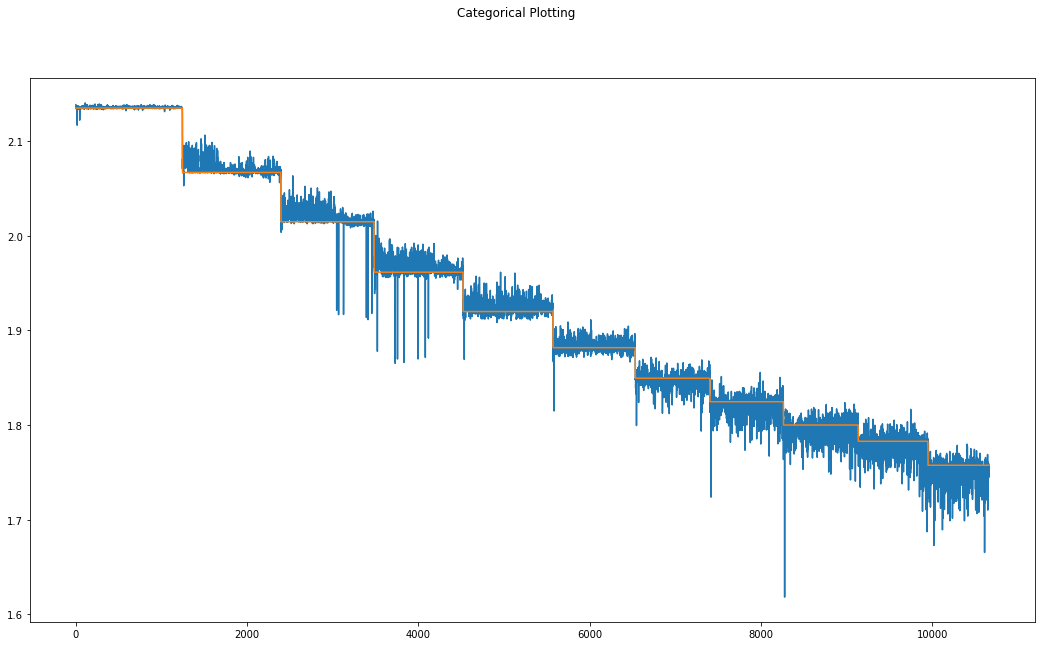

In [22]:
# 10. Plotting di predizioni e label del test set.
plt.figure(figsize=(18, 10))
plt.plot(y_pred)
plt.plot(df_test_y)
plt.suptitle('Categorical Plotting')
plt.show()
